### Linear Experiments

Here are linear experiments when the diversity condition holds.

Each experiment is performed by using MLP and Linear Encoder

In [57]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), '..'))

import torch

from spaces import NSphereSpace

from simclr.simclr import SimCLR

from visualization_utils.spheres import visualize_spheres_side_by_side
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# Training an encoder where we map from Sphere to R^4 injectively and then map back to the sphere

from experiment_utils.linear import perform_linear_experiment
import torch.nn as nn

from visualization_utils.scoring import plot_scores
from visualization_utils.spheres import scatter3d_sphere
from encoders import SphericalEncoder, LinearEncoder

latent_dim = 3

tau = 0.2
kappa = 1 / tau

iterations_default = 20000
batch_default = 6144

# torch.manual_seed(789)

sphere = NSphereSpace(latent_dim)

sample_pair_fixed = lambda batch: sphere.sample_pair_vmf(batch, kappa)
sample_uniform_fixed = lambda batch: sphere.uniform(batch)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def get_spherical_encoder(input_dim, output_dim):
    return SphericalEncoder(input_dim, [128, 256, 256, 256, 128], output_dim)


def get_linear_encoder(input_dim, output_dim):
    return LinearEncoder(input_dim, output_dim)


def perform_experiment(dimension, encoder_type, its):
    input_dim = dimension
    output_dim = 3

    f = get_linear_encoder(input_dim, output_dim) if encoder_type == 'linear' else get_spherical_encoder(input_dim, output_dim)
    h, scores = perform_linear_experiment(
        input_dim, 
        its, 
        batch_default, 
        latent_dim, 
        sample_pair_fixed, 
        sample_uniform_fixed, 
        tau, 
        device, 
        f=f
    )

    plot_scores(plt, scores)

    z = sphere.uniform(1000).to(device)
    z_enc = h(z)

    visualize_spheres_side_by_side(plt, z.cpu(), z_enc.cpu())

    z = sphere.uniform(100000)
    fig = scatter3d_sphere(plt, z.cpu(), h(z.cuda()).cpu(), s=10, a=.8)
    fig = scatter3d_sphere(plt, z.cpu(), z.cpu(), s=10, a=.8)


print('Using device', device)

Using device cuda


## Experiment: Linear map to 4 dimensions, MLP Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.397687911987305 Samples processed: 1 linear disentanglement: 0.29429519176483154 permutation disentanglement: 0.26512500643730164 angle_preservation_error: 0.2699076533317566
Loss: 7.473193645477295 Samples processed: 21 linear disentanglement: 0.9838492274284363 permutation disentanglement: 0.8678970336914062 angle_preservation_error: 0.042243968695402145
Loss: 7.408293724060059 Samples processed: 41 linear disentanglement: 0.9962685108184814 permutation disentanglement: 0.8662284016609192 angle_preservation_error: 0.01980412006378174
Loss: 7.41855001449585 Samples processed: 61 linear disentanglement: 0.9979107975959778 permutation disentanglement: 0.8642078042030334 angle_preservation_error: 0.015638507902622223
Loss: 7.391376495361328 Samples processed: 81 linear disentanglement: 0.9985187649726868 permutation disentanglement: 0.8636563420295715 angle_preservation_error: 0.012973643839359283
Loss: 7.427928447723389 Sa

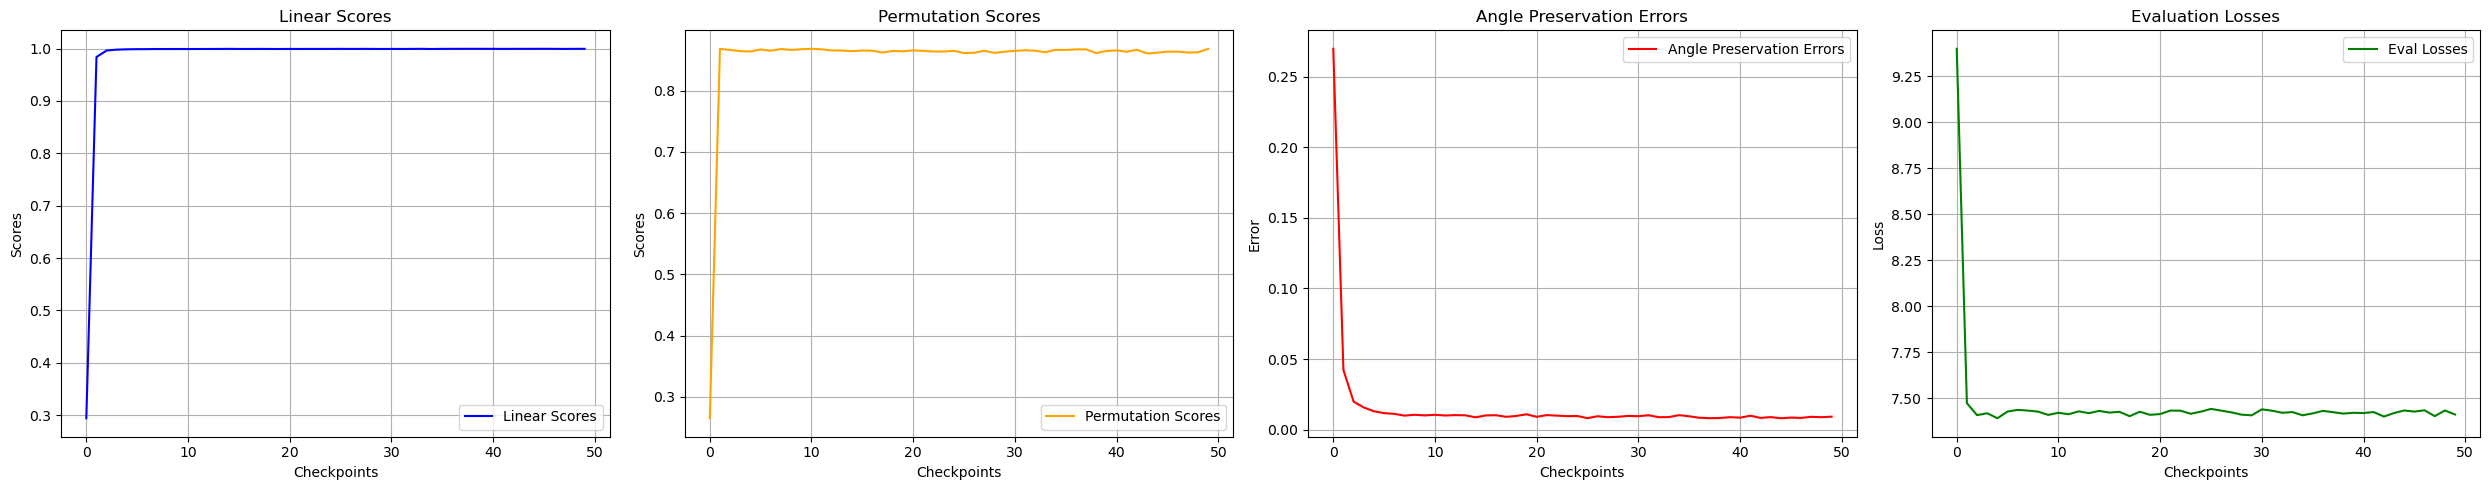

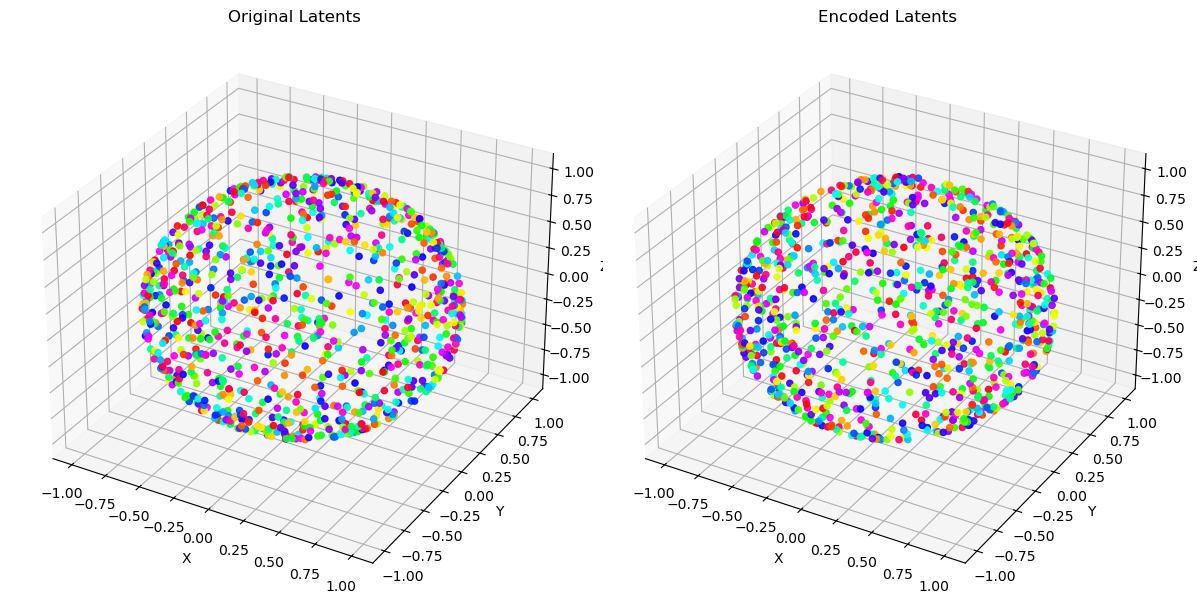

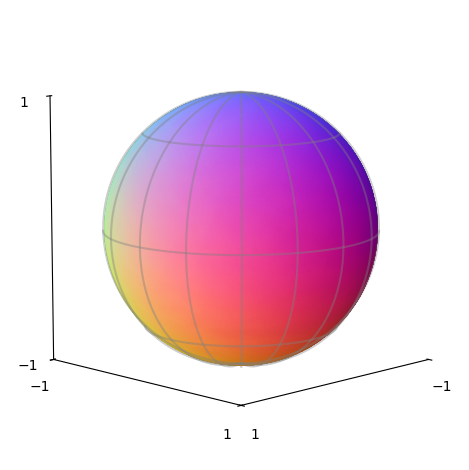

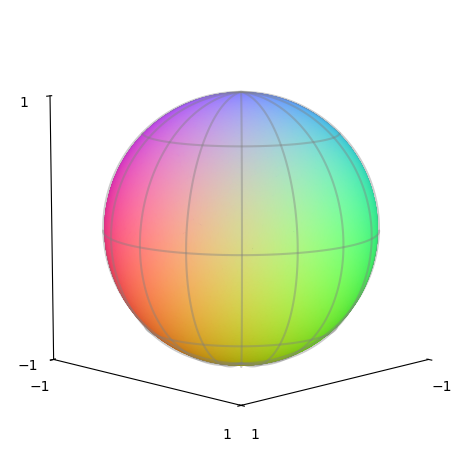

In [59]:
# 4 Dimensions
perform_experiment(4, 'mlp', 1000)

## Experiment: Linear map to 4 dimensions, Linear Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.184507369995117 Samples processed: 1 linear disentanglement: 0.771876871585846 permutation disentanglement: 0.15300165116786957 angle_preservation_error: 0.27418678998947144
Loss: 8.215047836303711 Samples processed: 21 linear disentanglement: 0.7752076983451843 permutation disentanglement: 0.15255708992481232 angle_preservation_error: 0.2754179537296295
Loss: 8.19730281829834 Samples processed: 41 linear disentanglement: 0.7821925282478333 permutation disentanglement: 0.16429074108600616 angle_preservation_error: 0.2735668122768402
Loss: 8.17080307006836 Samples processed: 61 linear disentanglement: 0.7898804545402527 permutation disentanglement: 0.1650233119726181 angle_preservation_error: 0.27147915959358215
Loss: 8.1241455078125 Samples processed: 81 linear disentanglement: 0.7926505208015442 permutation disentanglement: 0.16249410808086395 angle_preservation_error: 0.2702986001968384
Loss: 8.133673667907715 Samples p

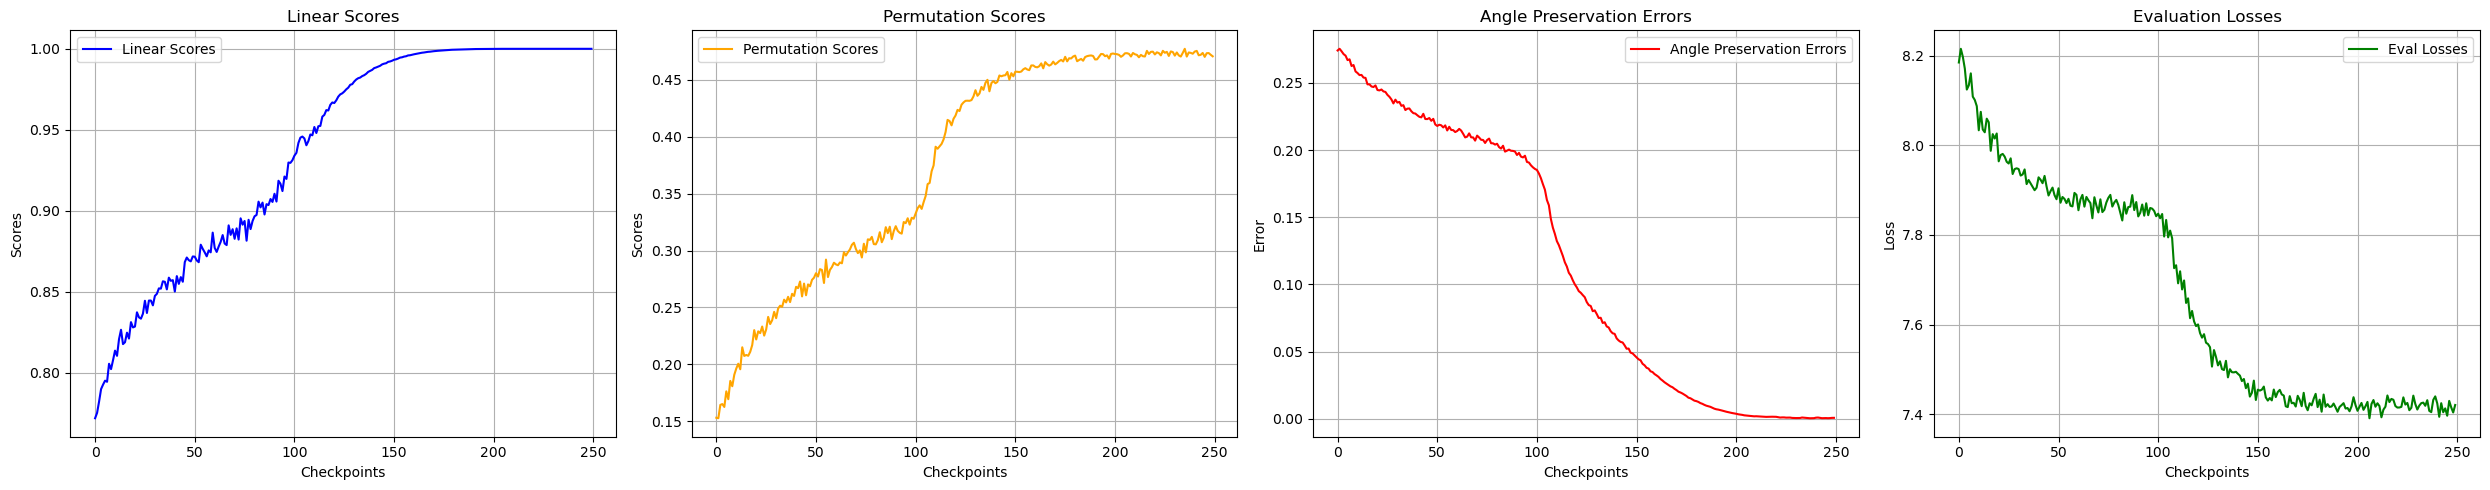

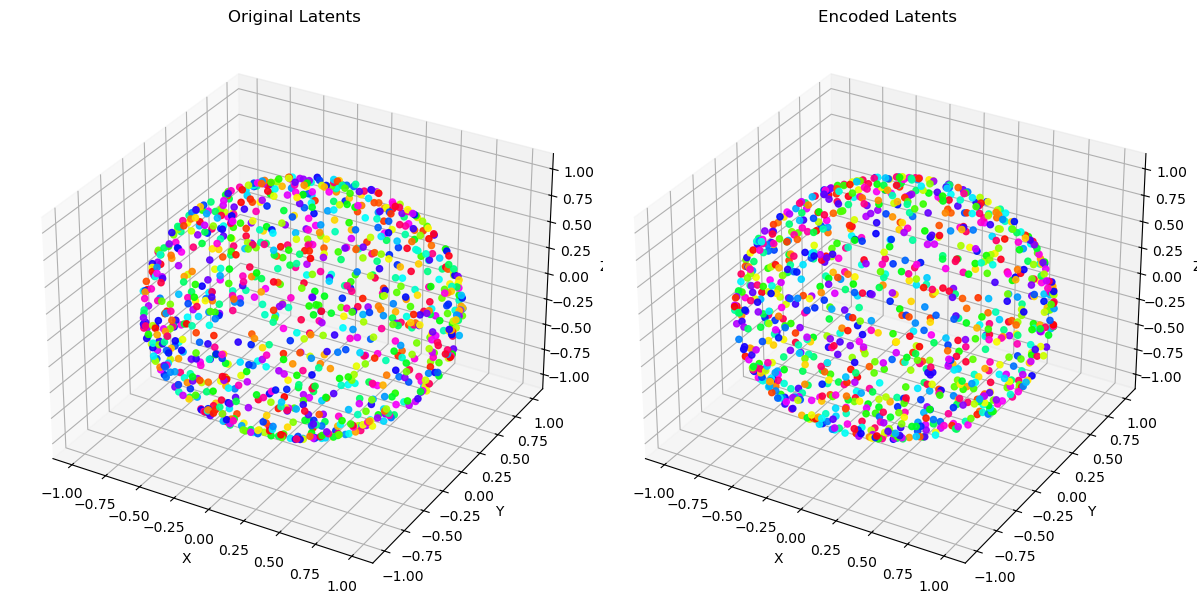

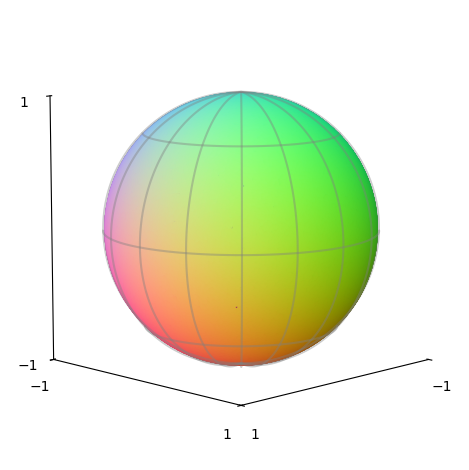

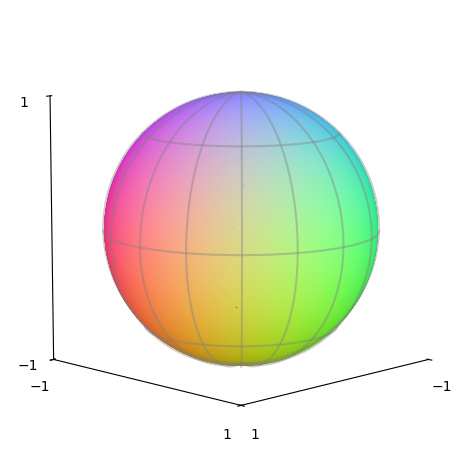

In [61]:
perform_experiment(4, 'linear', 5000)

## Experiment: Linear map to 5 dimensions, MLP Encoder

Linear control score: 1.0
Permutation control score: 0.9999999999999999
Loss: 9.184676170349121 Samples processed: 1 linear disentanglement: 0.35864996910095215 permutation disentanglement: 0.17238207161426544 angle_preservation_error: 0.25437888503074646
Loss: 7.4784698486328125 Samples processed: 21 linear disentanglement: 0.9882748126983643 permutation disentanglement: 0.46493878960609436 angle_preservation_error: 0.039731673896312714
Loss: 7.449426174163818 Samples processed: 41 linear disentanglement: 0.9966788291931152 permutation disentanglement: 0.48746538162231445 angle_preservation_error: 0.01968042366206646
Loss: 7.408267974853516 Samples processed: 61 linear disentanglement: 0.9981133937835693 permutation disentanglement: 0.4816237986087799 angle_preservation_error: 0.015457261353731155
Loss: 7.408631801605225 Samples processed: 81 linear disentanglement: 0.9988682270050049 permutation disentanglement: 0.4861598014831543 angle_preservation_error: 0.01080594677478075
Loss: 7

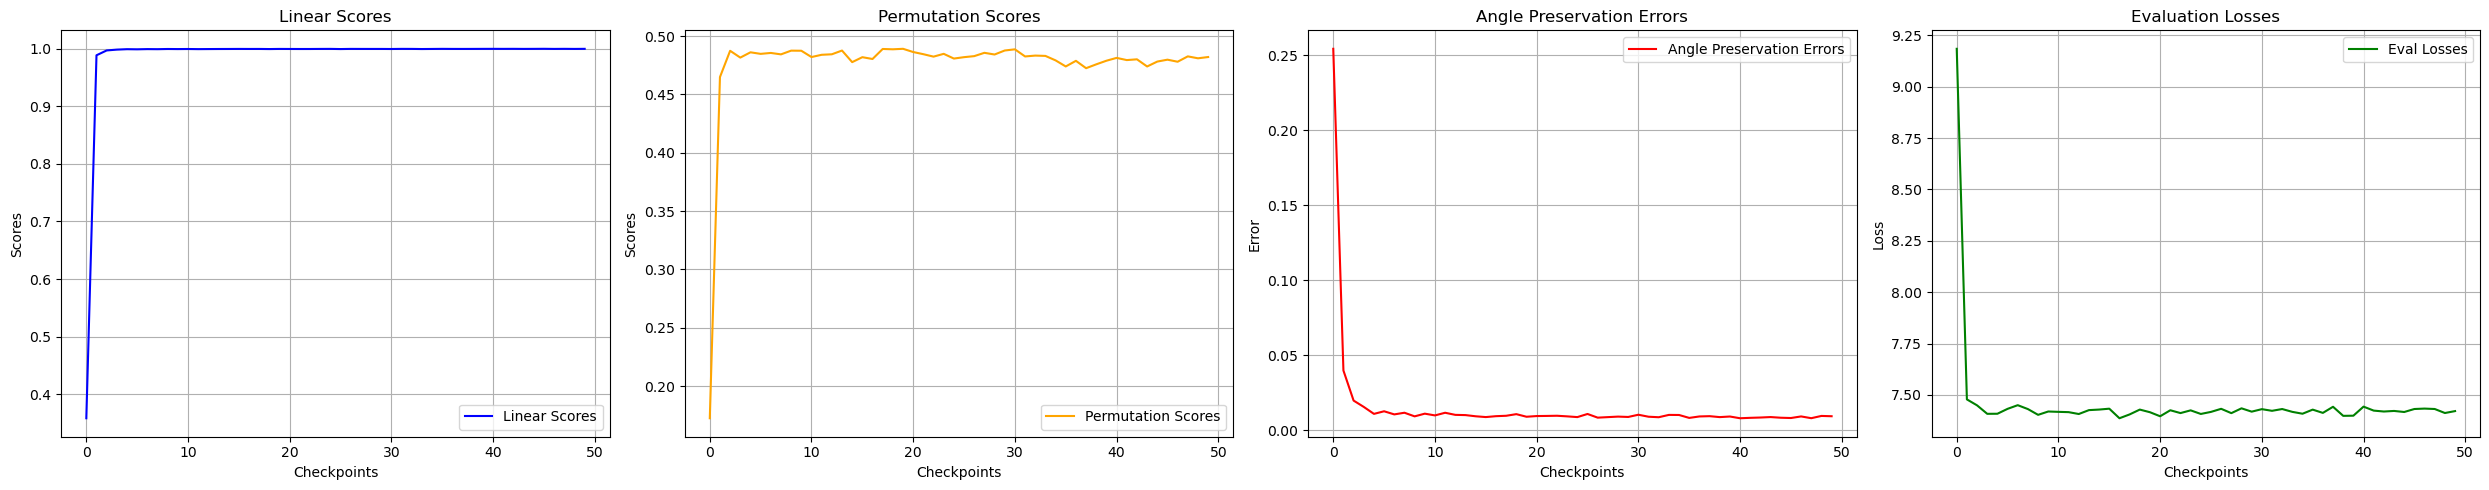

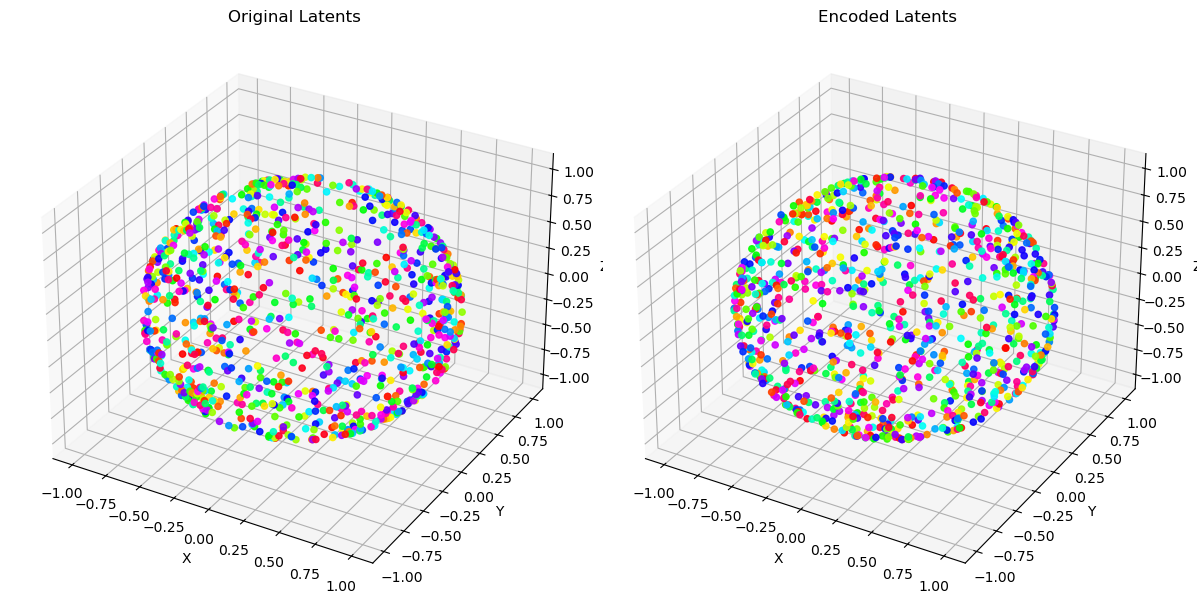

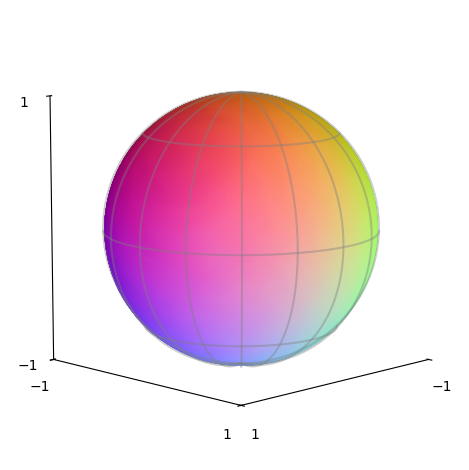

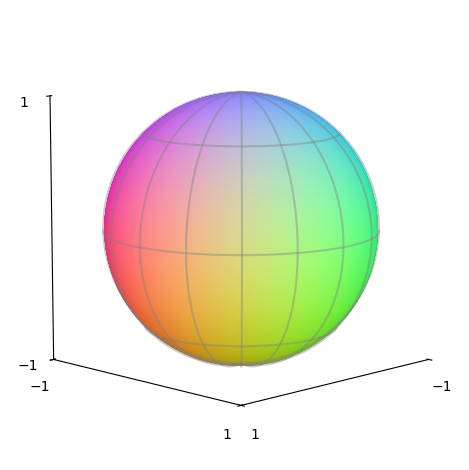

In [62]:
perform_experiment(5, 'mlp', 1000)

# 5 dimensions, linear encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.250181198120117 Samples processed: 1 linear disentanglement: 0.7639824748039246 permutation disentanglement: 0.23782914876937866 angle_preservation_error: 0.26242679357528687
Loss: 8.266459465026855 Samples processed: 21 linear disentanglement: 0.7709053158760071 permutation disentanglement: 0.2393694669008255 angle_preservation_error: 0.2648950517177582
Loss: 8.27390193939209 Samples processed: 41 linear disentanglement: 0.7682504653930664 permutation disentanglement: 0.24399487674236298 angle_preservation_error: 0.2645522654056549
Loss: 8.226715087890625 Samples processed: 61 linear disentanglement: 0.7699427604675293 permutation disentanglement: 0.24772615730762482 angle_preservation_error: 0.2647775113582611
Loss: 8.201774597167969 Samples processed: 81 linear disentanglement: 0.771280825138092 permutation disentanglement: 0.25904759764671326 angle_preservation_error: 0.2634873688220978
Loss: 8.178808212280273 Samples

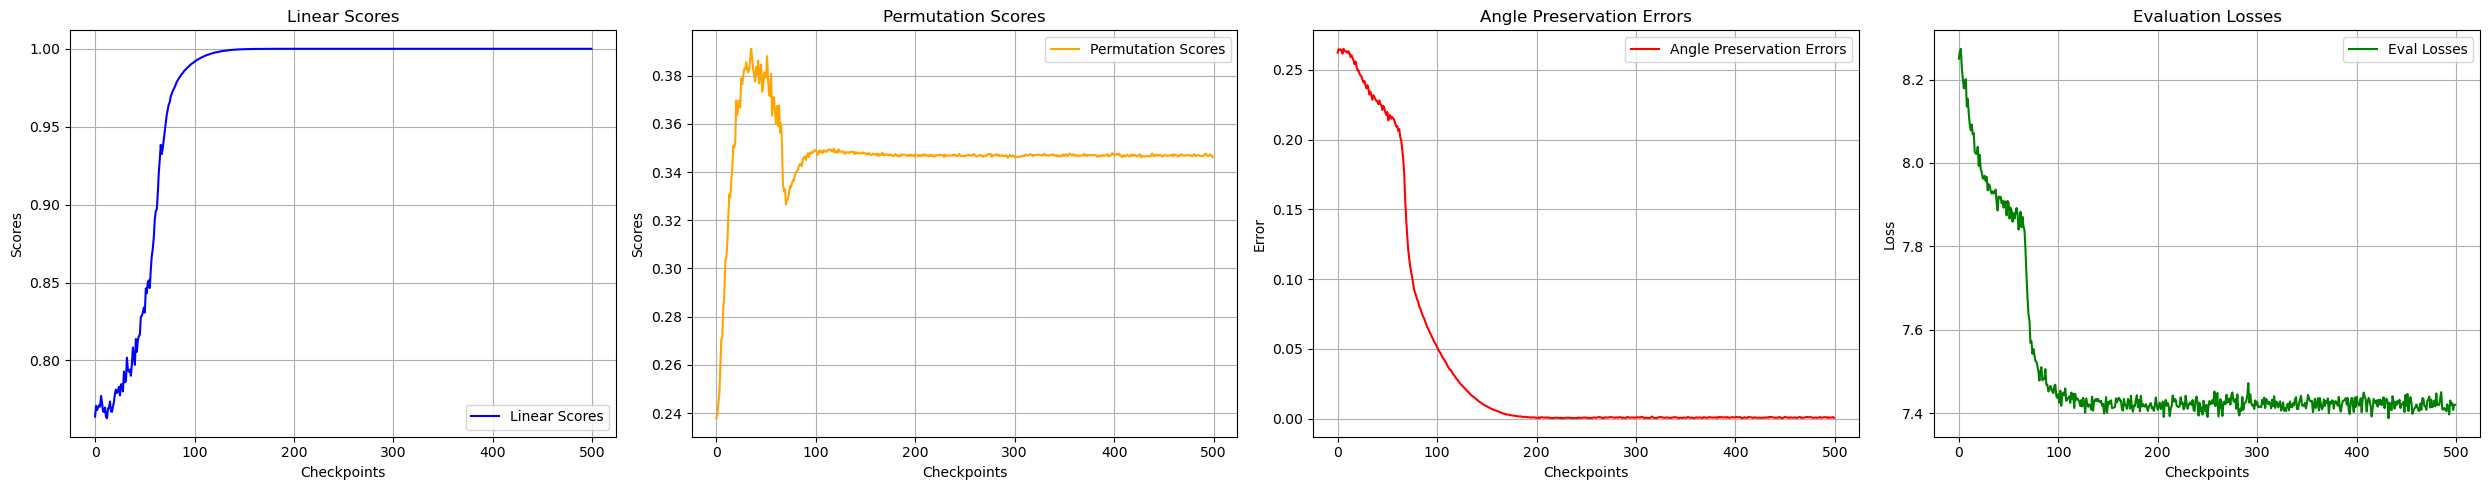

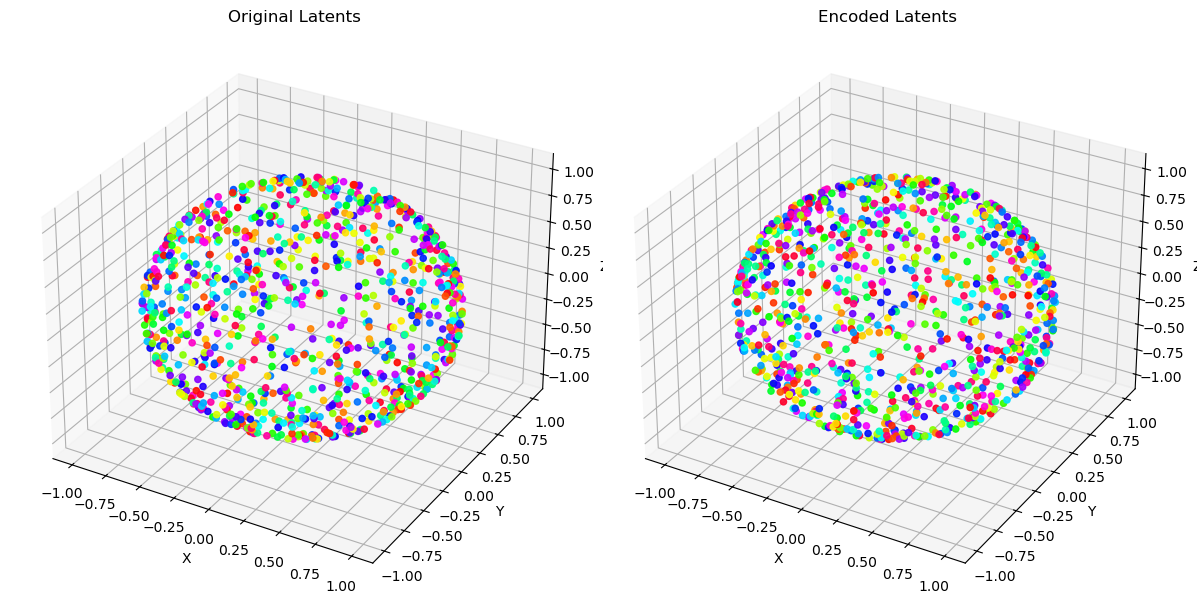

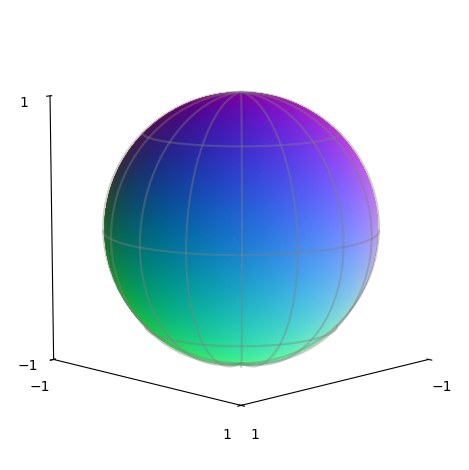

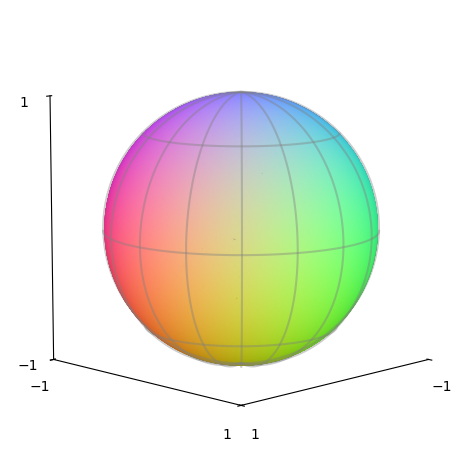

In [64]:
perform_experiment(5, 'linear', 10000)

# 6 Dimensions MLP Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 9.456125259399414 Samples processed: 1 linear disentanglement: 0.2010776847600937 permutation disentanglement: 0.08270331472158432 angle_preservation_error: 0.29461854696273804
Loss: 7.939004421234131 Samples processed: 21 linear disentanglement: 0.6627222895622253 permutation disentanglement: 0.13073240220546722 angle_preservation_error: 0.1465378701686859
Loss: 7.866219520568848 Samples processed: 41 linear disentanglement: 0.7234595417976379 permutation disentanglement: 0.1559206247329712 angle_preservation_error: 0.12494545429944992
Loss: 7.511083126068115 Samples processed: 61 linear disentanglement: 0.9710516333580017 permutation disentanglement: 0.17286066710948944 angle_preservation_error: 0.05360766872763634
Loss: 7.424307823181152 Samples processed: 81 linear disentanglement: 0.9941226840019226 permutation disentanglement: 0.19057722389698029 angle_preservation_error: 0.03209036588668823
Loss: 7.4365363121032715 S

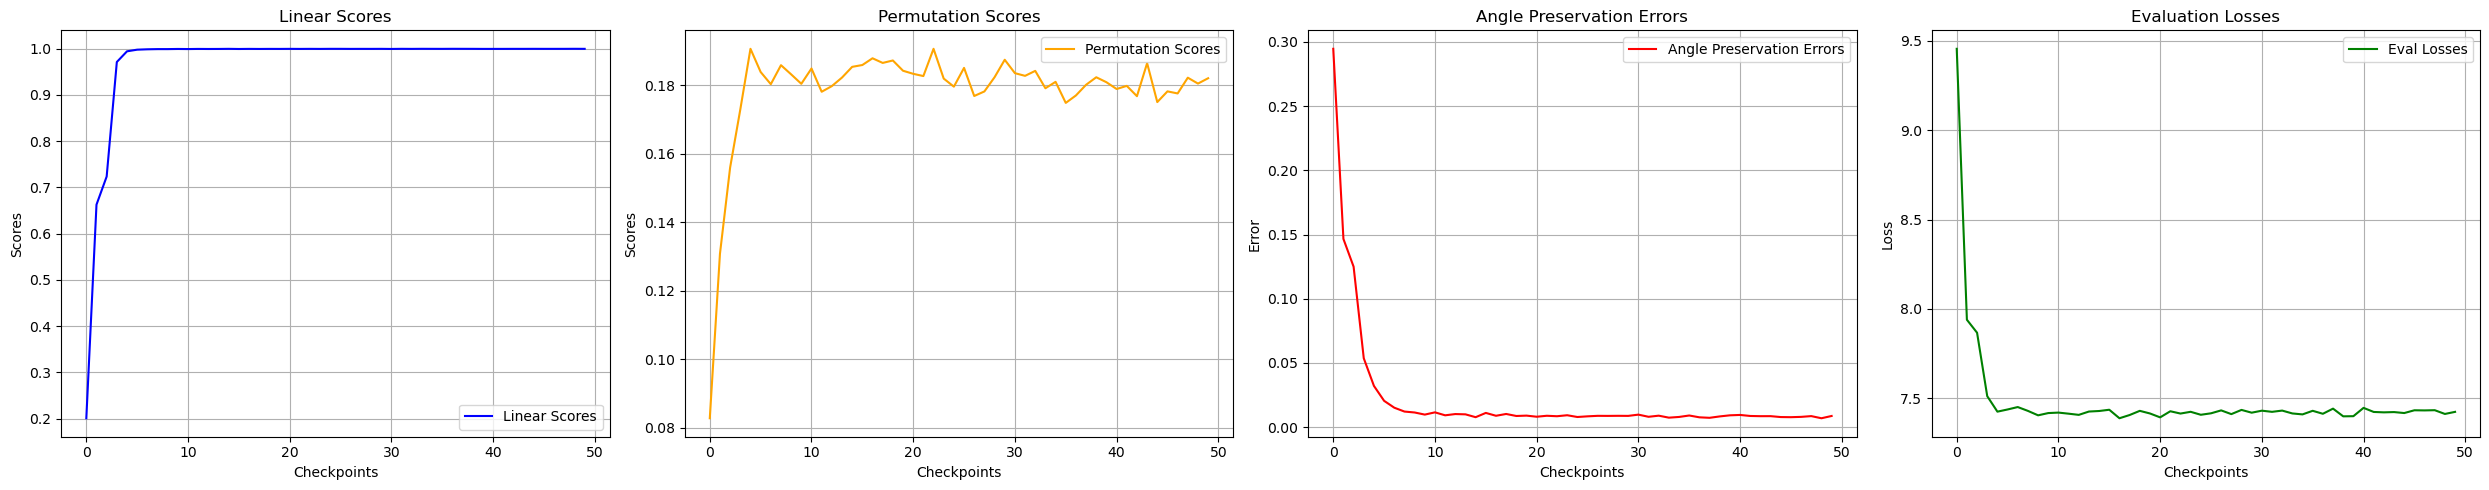

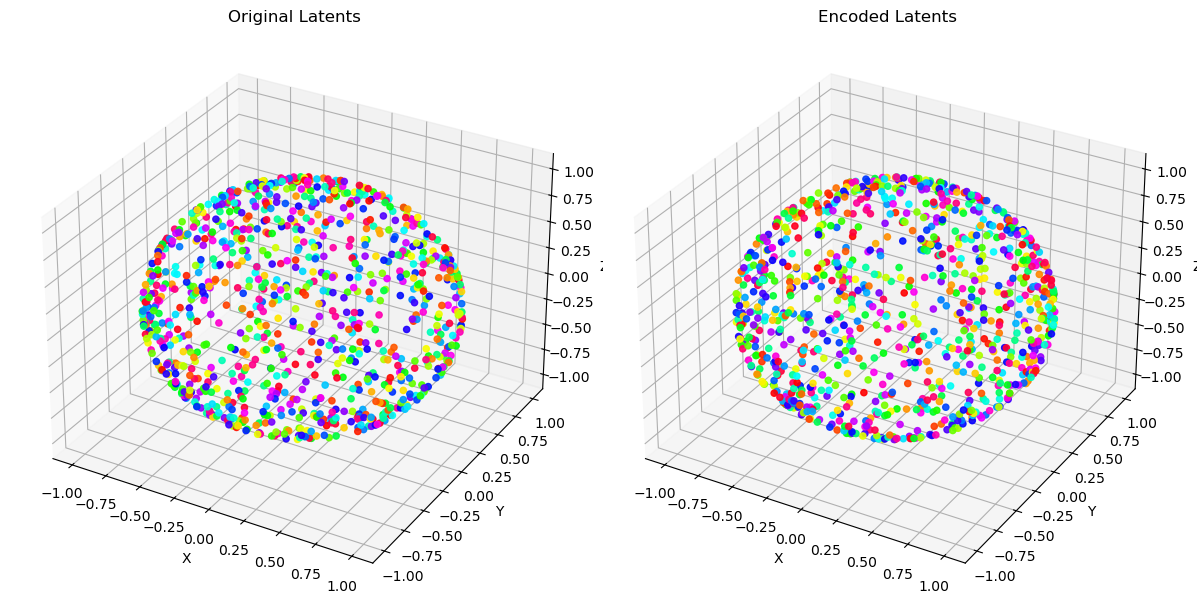

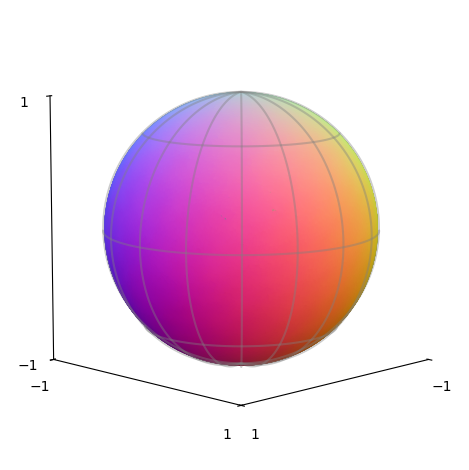

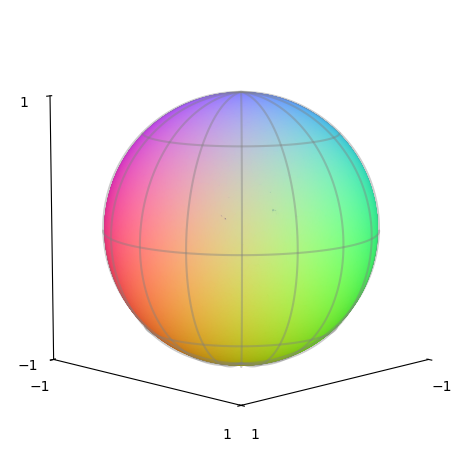

In [66]:
perform_experiment(6, 'mlp', 1000)

# 6 Dimensions Linear Encoder

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.233203887939453 Samples processed: 1 linear disentanglement: 0.8112566471099854 permutation disentanglement: 0.2368728369474411 angle_preservation_error: 0.19614027440547943
Loss: 8.209412574768066 Samples processed: 21 linear disentanglement: 0.8233636021614075 permutation disentanglement: 0.237723246216774 angle_preservation_error: 0.19036072492599487
Loss: 8.222698211669922 Samples processed: 41 linear disentanglement: 0.8238964080810547 permutation disentanglement: 0.2400931566953659 angle_preservation_error: 0.1903575360774994
Loss: 8.166144371032715 Samples processed: 61 linear disentanglement: 0.8269171118736267 permutation disentanglement: 0.23009730875492096 angle_preservation_error: 0.1869548112154007
Loss: 8.135031700134277 Samples processed: 81 linear disentanglement: 0.8316075205802917 permutation disentanglement: 0.237756609916687 angle_preservation_error: 0.18527528643608093
Loss: 8.150333404541016 Samples 

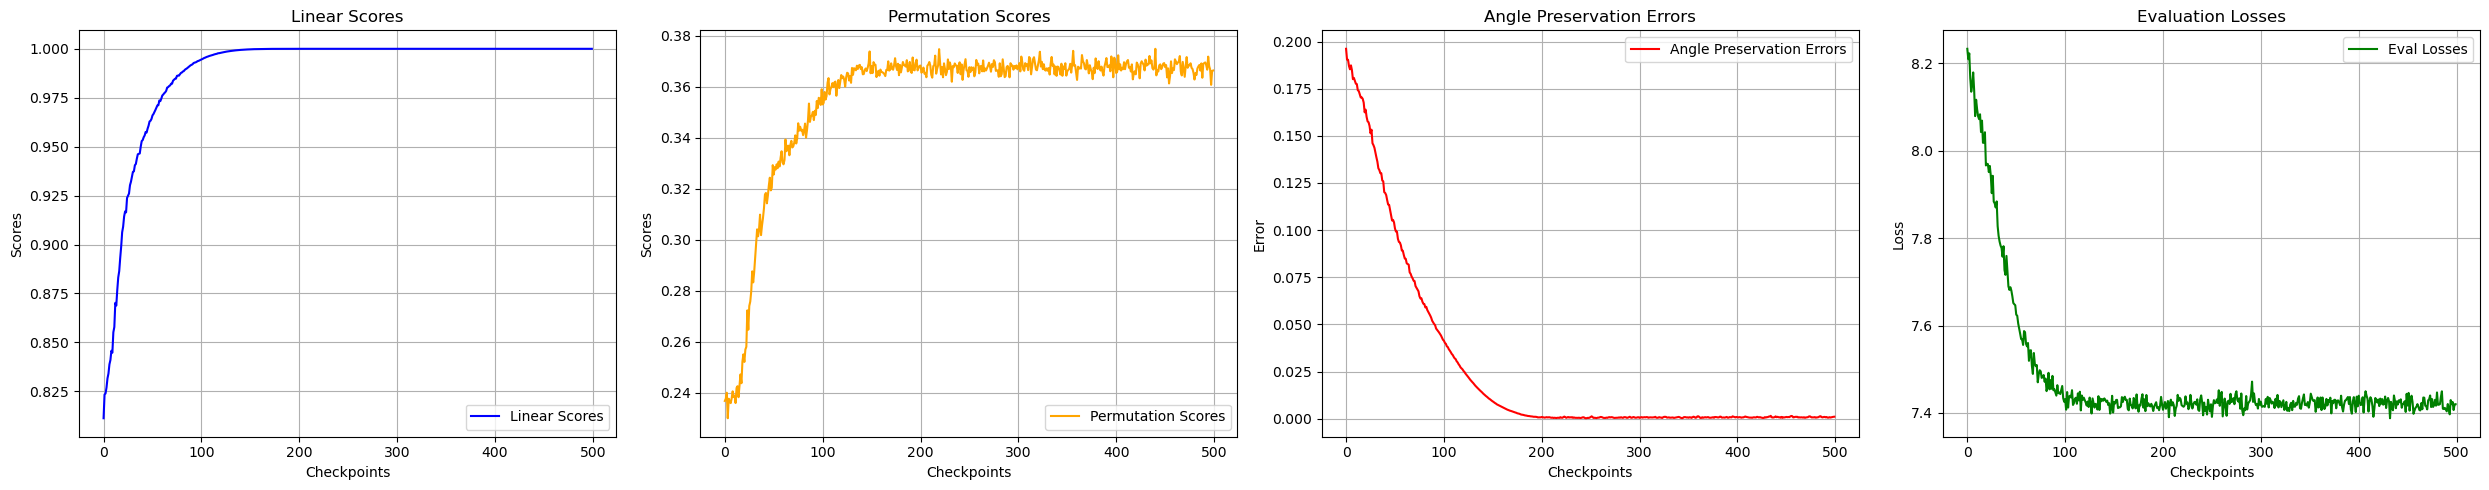

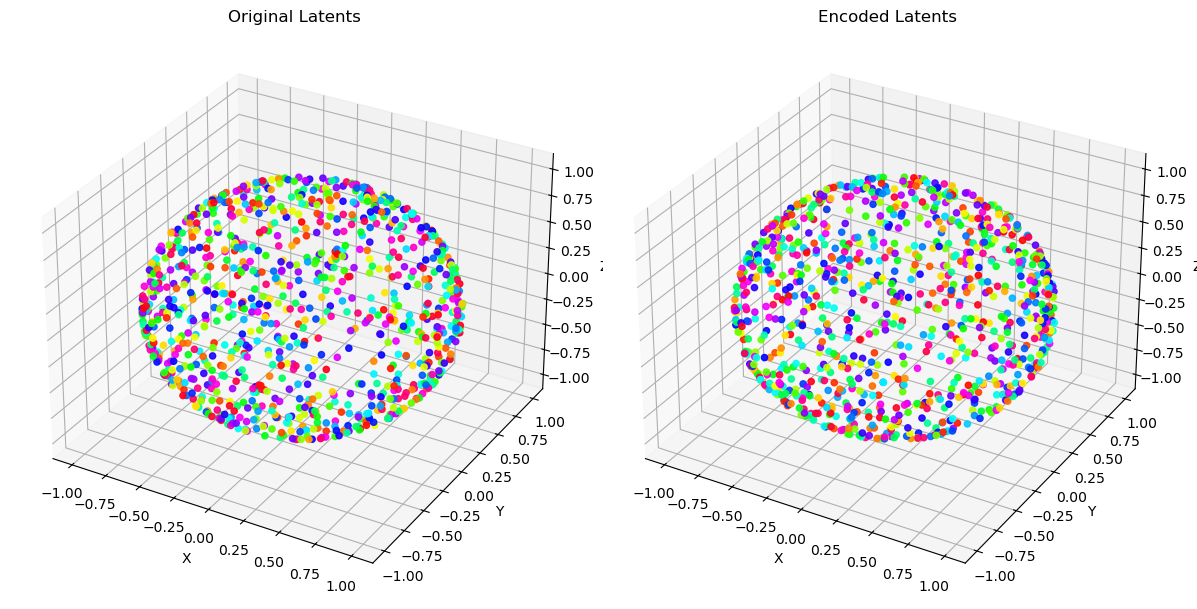

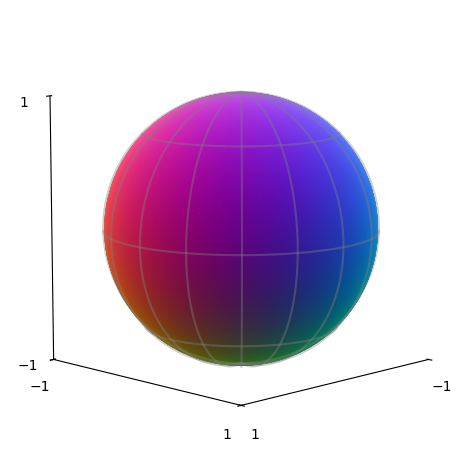

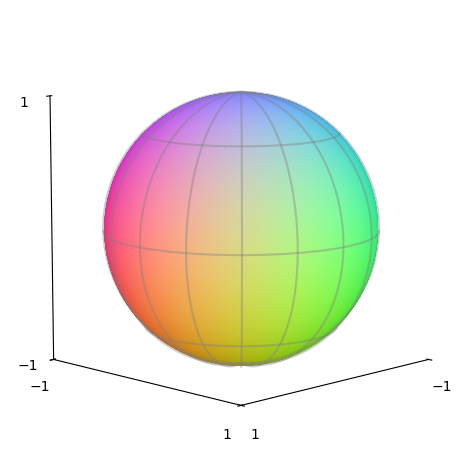

In [67]:
# 6 Dimensions

perform_experiment(6, 'linear', 10000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.924330711364746 Samples processed: 1 linear disentanglement: 0.4641733467578888 permutation disentanglement: 0.2357158213853836 angle_preservation_error: 0.22100797295570374
Loss: 7.905312538146973 Samples processed: 21 linear disentanglement: 0.7013700604438782 permutation disentanglement: 0.36298608779907227 angle_preservation_error: 0.13594858348369598
Loss: 7.484092712402344 Samples processed: 41 linear disentanglement: 0.9867988228797913 permutation disentanglement: 0.3841681480407715 angle_preservation_error: 0.04050865396857262
Loss: 7.4141154289245605 Samples processed: 61 linear disentanglement: 0.9965359568595886 permutation disentanglement: 0.39165982604026794 angle_preservation_error: 0.021677250042557716
Loss: 7.410081386566162 Samples processed: 81 linear disentanglement: 0.9982393383979797 permutation disentanglement: 0.39014220237731934 angle_preservation_error: 0.01576281152665615
Loss: 7.4332275390625 Sa

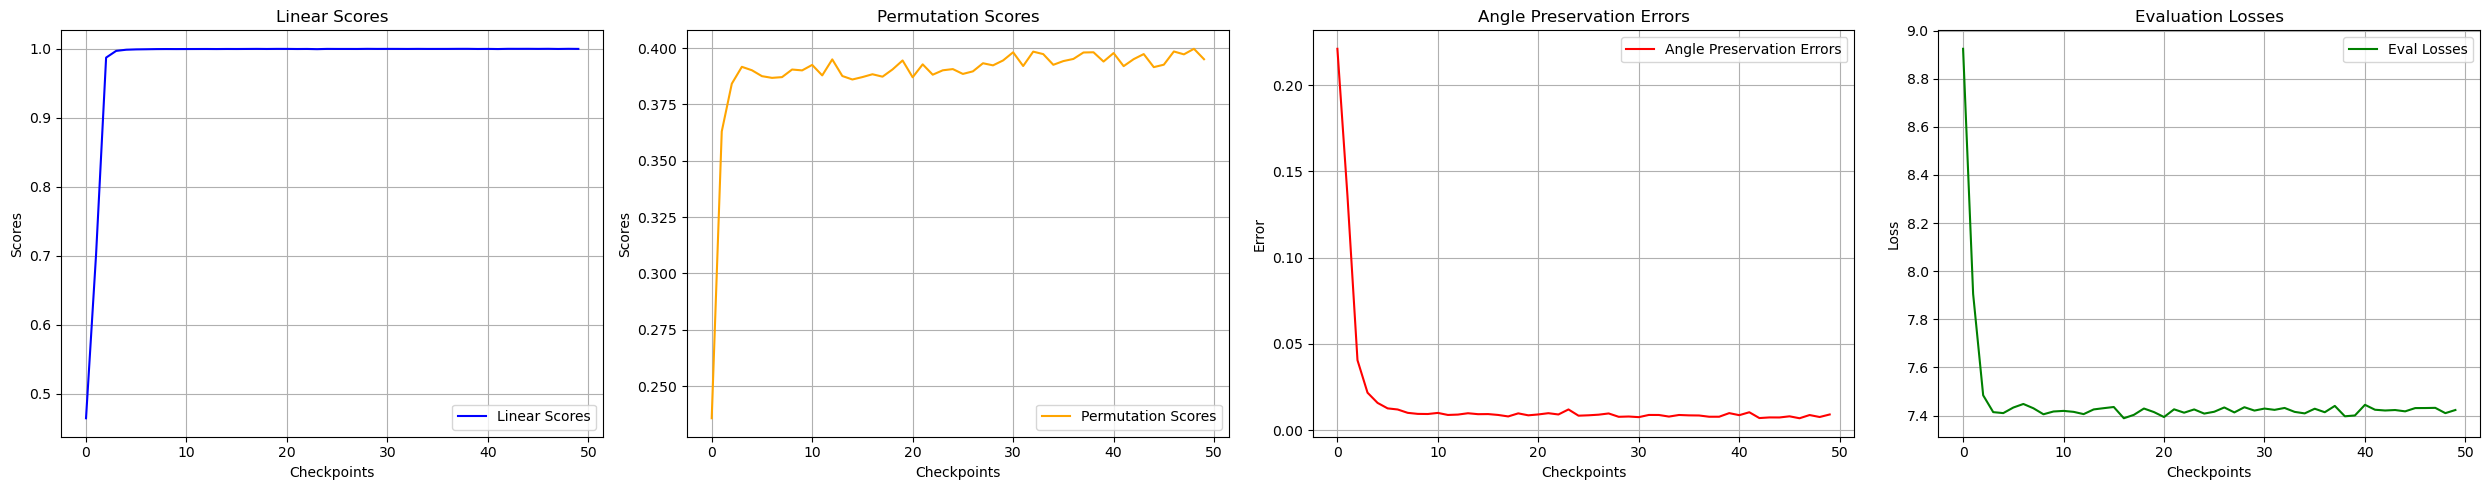

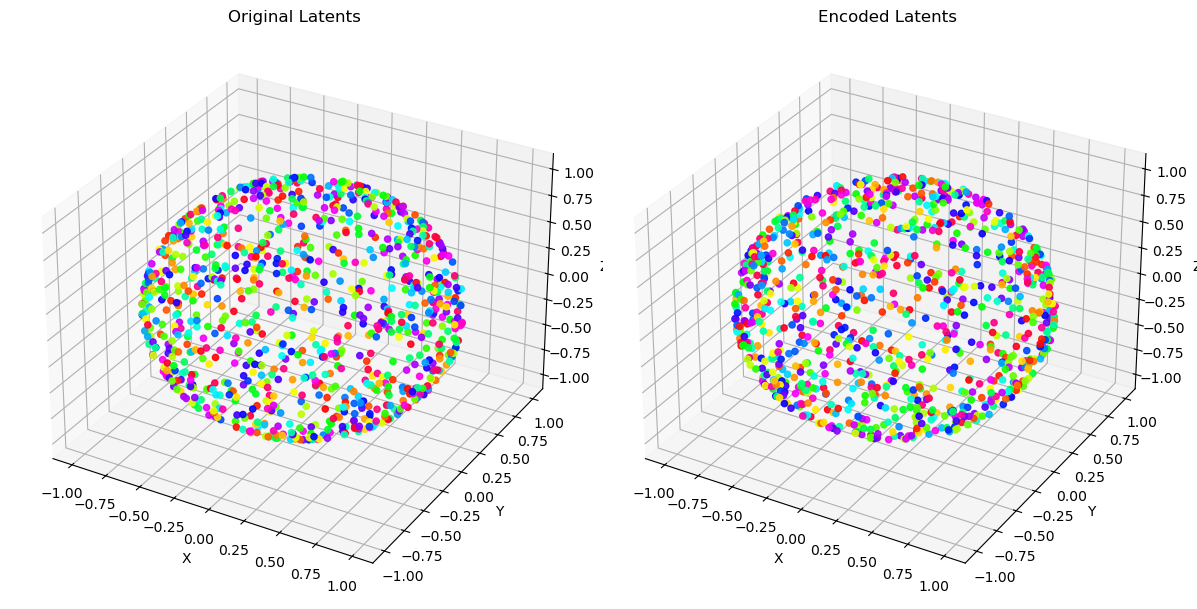

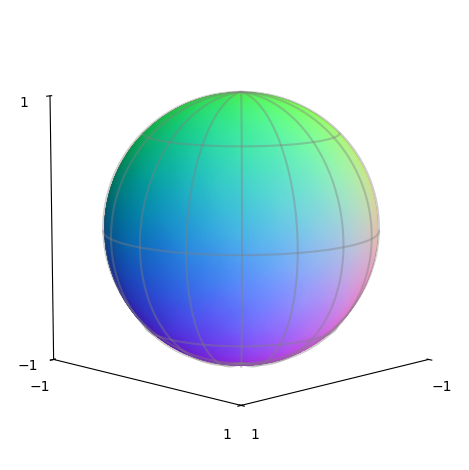

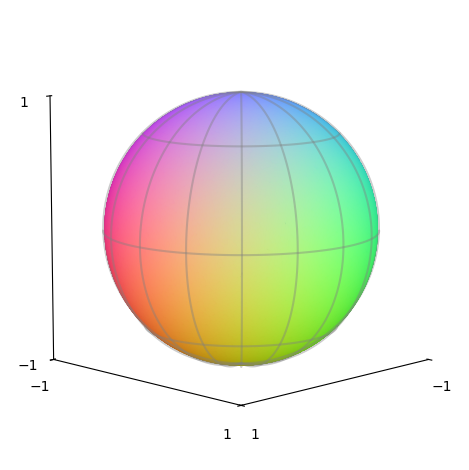

In [68]:
# 7 Dimensions

perform_experiment(7, 'mlp', 1000)

Linear control score: 1.0
Permutation control score: 1.0
Loss: 8.374744415283203 Samples processed: 1 linear disentanglement: 0.799196183681488 permutation disentanglement: 0.2517506778240204 angle_preservation_error: 0.24486562609672546
Loss: 8.358495712280273 Samples processed: 21 linear disentanglement: 0.8072905540466309 permutation disentanglement: 0.2503204047679901 angle_preservation_error: 0.24308401346206665
Loss: 8.375336647033691 Samples processed: 41 linear disentanglement: 0.8108609318733215 permutation disentanglement: 0.2499152570962906 angle_preservation_error: 0.23917251825332642
Loss: 8.291730880737305 Samples processed: 61 linear disentanglement: 0.8190476298332214 permutation disentanglement: 0.25408369302749634 angle_preservation_error: 0.2359716296195984
Loss: 8.273838996887207 Samples processed: 81 linear disentanglement: 0.8268681168556213 permutation disentanglement: 0.2541702091693878 angle_preservation_error: 0.23342320322990417
Loss: 8.276559829711914 Sample

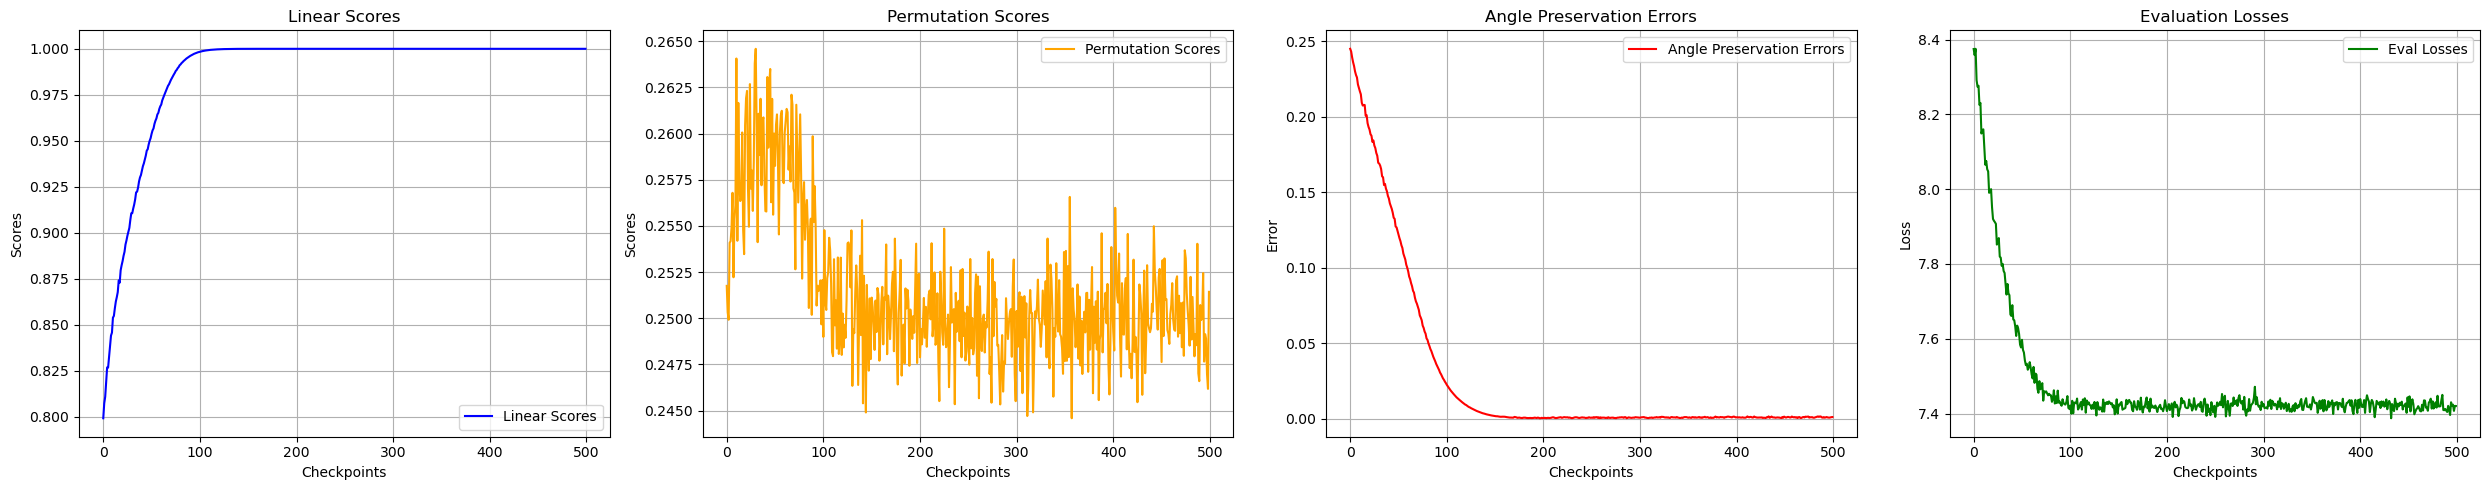

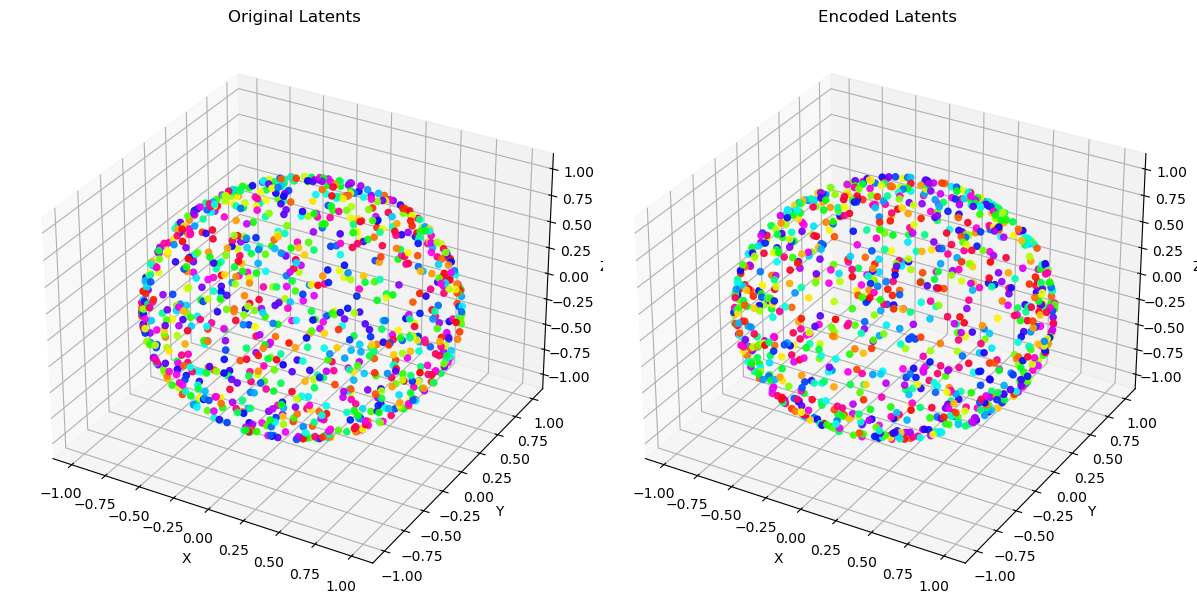

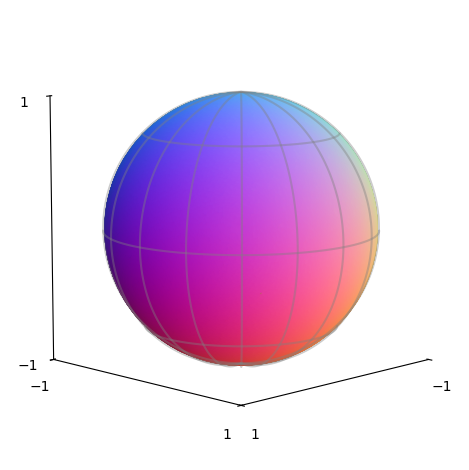

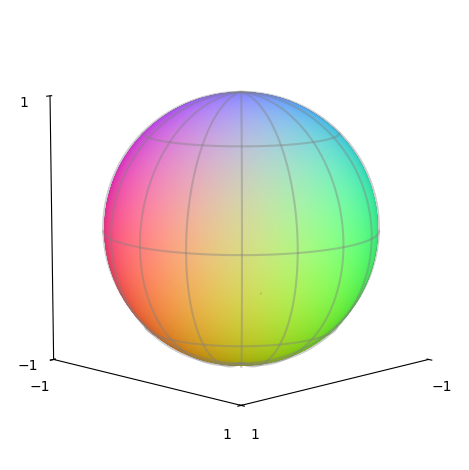

In [69]:
perform_experiment(7, 'linear', 10000)